# Preamble

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from astropy.cosmology import Planck18
import h5py
import seaborn as sns
import pandas as pd

# Figure 2 Right Plot in Section 3

In [2]:
var = "N1e7_Fiducial_AllDCO_AIS"

h_marg = []
Om_marg = []

with h5py.File("/home/soumendrakishore.roy/Data_Release_RedEvolBNS/inference_marginal_fiducial.h5",'r') as hf:
    for i in [1]:
        h_marg.append(np.array(hf['h'+str(i)]))
        Om_marg.append(np.array(hf['Om'+str(i)]))
hf.close()

In [3]:
h_full = []
Om_full = []
with h5py.File("/home/soumendrakishore.roy/Data_Release_RedEvolBNS/inference_full_fiducial.h5",'r') as hf:
    for i in [1]:
        h_full.append(np.array(hf['h'+str(i)]))
        Om_full.append(np.array(hf['Om'+str(i)]))
hf.close()

In [4]:
data = {
    'Hubble Constant (in km/s/Mpc)': np.array([h_full[0], h_marg[0]]).flatten()*100,
    'Dark Matter Density': np.array([Om_full[0], Om_marg[0]]).flatten(),
    'Population': np.array([np.full(h_full[0].shape[0], r'Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, q)\pi(z)$', dtype=object), 
            np.full(h_marg[0].shape[0], r'Uncorrelated Pop: $\pi(M_c, q, z) = \pi(M_c, q)\pi(z)$', dtype=object)]).flatten()
}

df = pd.DataFrame(data)
print(df)

      Hubble Constant (in km/s/Mpc)  Dark Matter Density  \
0                         66.822342             0.307557   
1                         67.623245             0.301289   
2                         67.151291             0.310468   
3                         67.560600             0.300206   
4                         66.845589             0.321288   
...                             ...                  ...   
1995                      68.163773             0.282499   
1996                      68.112480             0.280984   
1997                      68.714317             0.253224   
1998                      68.911270             0.266013   
1999                      68.774887             0.269651   

                                             Population  
0     Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, ...  
1     Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, ...  
2     Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, ...  
3     Correlated Pop: $\pi(M_c, q, z) \neq \pi(

/home/soumendrakishore.roy/.conda/envs/popcosmo/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/soumendrakishore.roy/.conda/envs/popcosmo/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


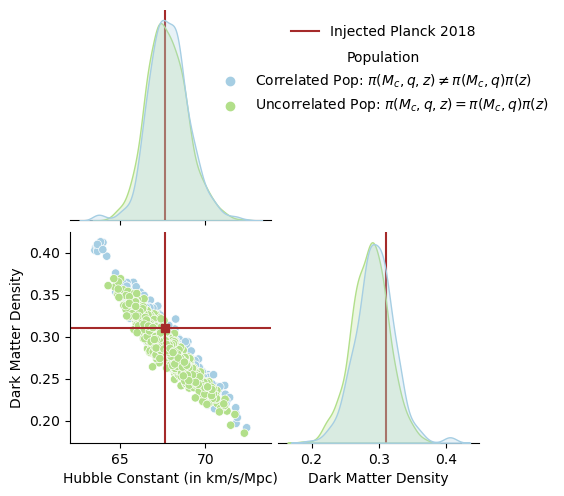

In [5]:
sns.set_palette("colorblind")
my_palette = {r"Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, q)\pi(z)$": "#A6CEE3", r"Uncorrelated Pop: $\pi(M_c, q, z) = \pi(M_c, q)\pi(z)$": "#B2DF8A"}

fig = sns.pairplot(df, hue="Population", diag_kind="kde", palette=my_palette, corner=True)

true = np.array([Planck18.H0.value,Planck18.Om0])
# Extract the axes
axes = np.array(fig.axes).reshape((len(true), len(true)))

# Loop over the diagonal
for i in range(len(true)):
    ax = axes[i, i]
    ax.axvline(true[i], color="brown")



# Loop over the histograms
for yi in range(len(true)):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(true[xi], color="brown")
        ax.axhline(true[yi], color="brown")
        ax.plot(true[xi], true[yi], marker="s", color="brown")
sns.move_legend(fig, "upper center", bbox_to_anchor=(0.46, 0.92))
#fig.add_legend()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="Injected Planck 2018")

plt.legend(handles=[brown_line], bbox_to_anchor=(0., 1.95, 1., .0), loc=6, frameon=False)
plt.savefig("Plots/Fig2_"+var+"_H0_Om.pdf", bbox_inches="tight");

In [6]:
var = "N1e7_MullerMandel_AllDCO_AIS"

h_marg = []
Om_marg = []

with h5py.File("/home/soumendrakishore.roy/Data_Release_RedEvolBNS/inference_marginal_MM.h5",'r') as hf:
    for i in [1]:
        h_marg.append(np.array(hf['h'+str(i)]))
        Om_marg.append(np.array(hf['Om'+str(i)]))
hf.close()

In [7]:
h_full = []
Om_full = []
with h5py.File("/home/soumendrakishore.roy/Data_Release_RedEvolBNS/inference_full_MM.h5",'r') as hf:
    for i in [1]:
        h_full.append(np.array(hf['h'+str(i)]))
        Om_full.append(np.array(hf['Om'+str(i)]))
hf.close()

In [8]:
data = {
    'Hubble Constant (in km/s/Mpc)': np.array([h_full[0], h_marg[0]]).flatten()*100,
    'Dark Matter Density': np.array([Om_full[0], Om_marg[0]]).flatten(),
    'Population': np.array([np.full(h_full[0].shape[0], r'Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, q)\pi(z)$', dtype=object), 
            np.full(h_marg[0].shape[0], r'Uncorrelated Pop: $\pi(M_c, q, z) = \pi(M_c, q)\pi(z)$', dtype=object)]).flatten()
}

df = pd.DataFrame(data)
print(df)

      Hubble Constant (in km/s/Mpc)  Dark Matter Density  \
0                         66.266167             0.302551   
1                         67.034218             0.297466   
2                         66.473732             0.309834   
3                         66.875984             0.300169   
4                         66.017586             0.322680   
...                             ...                  ...   
1995                      66.523682             0.303446   
1996                      66.932640             0.313238   
1997                      67.492157             0.270354   
1998                      68.091026             0.287741   
1999                      68.177002             0.272405   

                                             Population  
0     Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, ...  
1     Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, ...  
2     Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, ...  
3     Correlated Pop: $\pi(M_c, q, z) \neq \pi(

/home/soumendrakishore.roy/.conda/envs/popcosmo/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/soumendrakishore.roy/.conda/envs/popcosmo/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


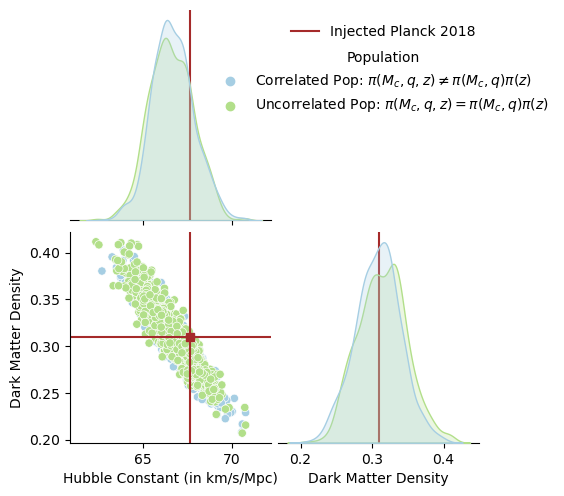

In [9]:
sns.set_palette("colorblind")
my_palette = {r"Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, q)\pi(z)$": "#A6CEE3", r"Uncorrelated Pop: $\pi(M_c, q, z) = \pi(M_c, q)\pi(z)$": "#B2DF8A"}

fig = sns.pairplot(df, hue="Population", diag_kind="kde", palette=my_palette, corner=True)

true = np.array([Planck18.H0.value,Planck18.Om0])
# Extract the axes
axes = np.array(fig.axes).reshape((len(true), len(true)))

# Loop over the diagonal
for i in range(len(true)):
    ax = axes[i, i]
    ax.axvline(true[i], color="brown")



# Loop over the histograms
for yi in range(len(true)):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(true[xi], color="brown")
        ax.axhline(true[yi], color="brown")
        ax.plot(true[xi], true[yi], marker="s", color="brown")
sns.move_legend(fig, "upper center", bbox_to_anchor=(0.46, 0.92))
#fig.add_legend()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="Injected Planck 2018")

plt.legend(handles=[brown_line], bbox_to_anchor=(0., 1.95, 1., .0), loc=6, frameon=False)
plt.savefig("Plots/Fig2_"+var+"_H0_Om.pdf", bbox_inches="tight");

# Figure 3 Left Plot in Section 3

In [10]:
lenp = 10
Nobs_plot = np.zeros(lenp)

with h5py.File("/home/soumendrakishore.roy/Data_Release_RedEvolBNS/mock_data.h5",'r') as hf:
    for i in range(lenp):
        Nobs_plot[i] = np.array(hf['Ndet'+str(i)])
hf.close()

Nobs_plot = Nobs_plot[:8]

In [11]:
h_marg = []
Om_marg = []

with h5py.File("/home/soumendrakishore.roy/Data_Release_RedEvolBNS/inference_full_result_Uncorrelated.h5",'r') as hf:
    for i in range(lenp):
        h_marg.append(np.array(hf['h'+str(i)]))
        Om_marg.append(np.array(hf['Om'+str(i)]))
hf.close()

h_marg = np.array(h_marg)
Om_marg = np.array(Om_marg)

h_marg = h_marg[:8]
Om_marg = Om_marg[:8]

In [12]:
h_full = []
Om_full = []

with h5py.File("/home/soumendrakishore.roy/Data_Release_RedEvolBNS/inference_full_result_Injected.h5",'r') as hf:
    for i in range(lenp):
        h_full.append(np.array(hf['h'+str(i)]))
        Om_full.append(np.array(hf['Om'+str(i)]))
hf.close()

h_full = np.array(h_full)
Om_full = np.array(Om_full)

h_full = h_full[:8]
Om_full = Om_full[:8]

In [13]:
data = {
    'Number of Detected BNSs': np.array([np.repeat(Nobs_plot, 1000), np.repeat(Nobs_plot, 1000)]).flatten().astype(np.int64),
    'Hubble Constant (in km/s/Mpc)': np.array([h_full.flatten(), h_marg.flatten()]).flatten()*100,
    'Dark Matter Density': np.array([Om_full.flatten(), Om_marg.flatten()]).flatten(),
    'Population': np.array([np.full(h_full.flatten().shape[0], r'Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, q)\pi(z)$', dtype=object), 
            np.full(h_marg.flatten().shape[0], r'Uncorrelated Pop: $\pi(M_c, q, z) = \pi(M_c, q)\pi(z)$', dtype=object)]).flatten()
}

df = pd.DataFrame(data)
print(df)

       Number of Detected BNSs  Hubble Constant (in km/s/Mpc)  \
0                           15                      63.514679   
1                           15                      63.342094   
2                           15                      59.927727   
3                           15                      64.437584   
4                           15                      57.302685   
...                        ...                            ...   
15995                     3034                      68.466049   
15996                     3034                      67.230423   
15997                     3034                      66.847763   
15998                     3034                      67.263580   
15999                     3034                      68.241829   

       Dark Matter Density                                         Population  
0                 0.396501  Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, ...  
1                 0.573702  Correlated Pop: $\pi(M_c, q, z)

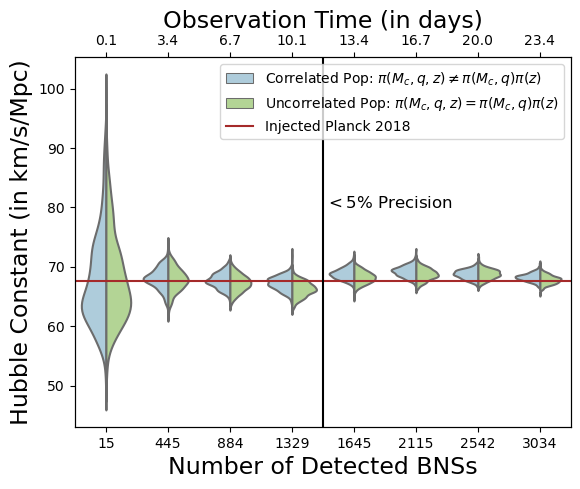

In [14]:
Tobs = np.linspace(0.1,30,10)[:8]
sns.color_palette('colorblind')
my_palette = {r'Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, q)\pi(z)$': "#A6CEE3", r'Uncorrelated Pop: $\pi(M_c, q, z) = \pi(M_c, q)\pi(z)$': "#B2DF8A"}

fig, ax1 = plt.subplots()

sns.violinplot(x='Number of Detected BNSs', y='Hubble Constant (in km/s/Mpc)', hue='Population', data=df, split=True, palette=my_palette, inner=None)
plt.axhline(Planck18.H0.value, color='brown', label='Injected Planck 2018')
plt.xlabel('Number of Detected BNSs', fontsize=17)
plt.ylabel('Hubble Constant (in km/s/Mpc)', fontsize=17)


ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels(['{:.1f}'.format(i) for i in Tobs])
ax2.set_xlabel('Observation Time (in days)', fontsize=17)
ax1.legend()

ax1.axvline(3.5, color='black')
ax1.text(5.6, 80, r'$<5\%$ Precision', fontsize=12, ha='right')
plt.show()
fig.savefig('Plots/Fig3_H0.pdf', bbox_inches='tight')

# Figure 3 Right Plot in Section 3

In [15]:
z_plot = np.linspace(0.,3.,5000)
n = -1
h_plot = h_marg[n]
Om_plot = Om_marg[n]

Hz = np.zeros((h_marg[-1].shape[0], z_plot.shape[0]))
for i in range(h_marg[-1].shape[0]):
    Hz[i] = 100*h_plot[i]*(Om_plot[i]*(1+z_plot)**3+(1-Om_plot[i]))**0.5
Hz = Hz.T
#Hz.shape = (N_z_plot, Nsamples)
Hz.shape

(5000, 1000)

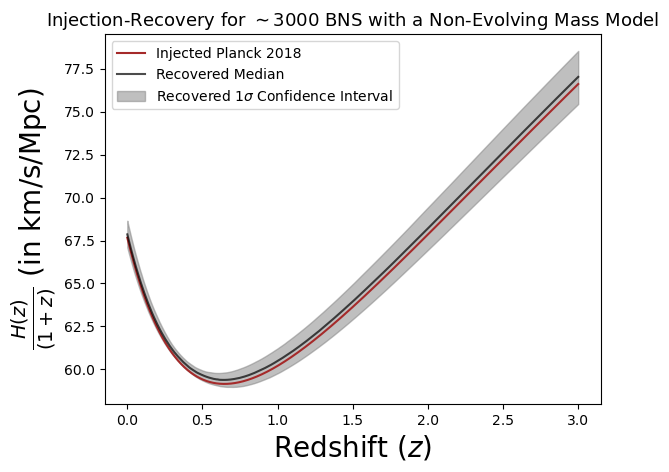

In [16]:
Hzd1pz = Hz/(1+z_plot[:,None])
Hzd1pzlq = np.quantile(Hzd1pz, 0.16, axis=1)
Hzd1pzhq = np.quantile(Hzd1pz, 0.84, axis=1)
Hzd1pzmed = np.median(Hzd1pz, axis=1)

plt.plot(z_plot, 100*Planck18.h*(Planck18.Om0*(1+z_plot)**3+(1-Planck18.Om0))**0.5/(1+z_plot), color='brown', label='Injected Planck 2018')
plt.plot(z_plot, Hzd1pzmed, color='k', alpha=0.7, label='Recovered Median')
plt.fill_between(z_plot, Hzd1pzlq, Hzd1pzhq, color='grey', alpha=0.5, label=r'Recovered $1\sigma$ Confidence Interval')
plt.legend()
plt.title(r'Injection-Recovery for $\sim3000$ BNS with a Non-Evolving Mass Model', fontsize=13)
plt.xlabel(r'Redshift ($z$)', fontsize=20)
plt.ylabel(r'$\frac{H(z)}{(1+z)}$ (in km/s/Mpc)', fontsize=20)
plt.savefig('Plots/Fig3_Hzdiv1pz.pdf', bbox_inches='tight')